<a href="https://colab.research.google.com/github/DharsanDk/sales-forecasting-model/blob/main/sales_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Forecasting Project Summary

**Tech Stack:** Python, Scikit-learn, XGBoost, Pandas, Flask/FastAPI, Docker, Airflow/Prefect, Tableau/Power BI

**Key Achievements:**

*   Developed a time-series ML model with feature engineering (lag features, rolling averages, seasonality) and hyperparameter tuning.
*   Achieved **85% accuracy** (or **15% MAE improvement**).
*   Deployed the model as a **REST API** (Flask/FastAPI) for real-time integration with BI tools (Tableau, Power BI) and ERP systems.

**Business Impact:**

*   Reduced stockouts by **20%** through proactive inventory planning.
*   Improved demand forecasting accuracy, leading to **$X in cost savings** (if quantifiable).

**Key Steps & Techniques Used:**

*   **Data Prep & Feature Engineering:**
    *   Cleaned & transformed raw sales data (handled missing values, outliers).
    *   Engineered time-based features (day-of-week, holidays, rolling averages).
    *   Applied log-transform to handle skewed sales data.
*   **Model Development:**
    *   Compared Random Forest, XGBoost, and ARIMA for optimal performance.
    *   Used cross-validation & hyperparameter tuning (Optuna/GridSearchCV) to minimize MAE/RMSE.
*   **Deployment & Integration:**
    *   Containerized the model (Docker) and deployed via FastAPI.
    *   Automated retraining pipeline (Airflow/Prefect) for weekly updates.
*   **Business Integration:**
    *   Connected to inventory management systems to trigger purchase orders.
    *   Built a Tableau dashboard for real-time sales vs. forecast tracking.

## Data loading and initial inspection

### Subtask:
Place the cells for loading the data and performing initial checks (shape, head, dtypes) at the beginning.


**Reasoning**:
The subtask is to arrange the code cells for data loading and initial checks at the beginning of the notebook. The first step is to place the data loading cell at the top. The provided context shows a cell that loads the data and displays the head. This cell should be moved to the beginning.



In [6]:
import pandas as pd

df = pd.read_csv('/content/sales_data.csv', encoding='latin-1')
display(df.head())

[2025-07-04T16:37:00.919+0000] {utils.py:164} INFO - NumExpr defaulting to 2 threads.


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Reasoning**:
The next step in the subtask is to place the initial data checks (shape, head, dtypes) directly after the data loading cell. The provided context shows a cell that performs these checks. This cell should be moved to the second position.



In [7]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

Data shape: (2823, 25)

First 5 rows:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



Data types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


## Data Loading and Initial Inspection

### Subtask:
Place the cells for loading the data and performing initial checks (shape, head, dtypes) at the beginning.

**Reasoning**:
The subtask is to arrange the code cells for data loading and initial checks at the beginning of the notebook. The first step is to place the data loading cell at the top. The provided context shows a cell that loads the data and displays the head. This cell should be moved to the beginning.

In [8]:
import pandas as pd

df = pd.read_csv('/content/sales_data.csv', encoding='latin-1')
display(df.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Reasoning**:
The next step in the subtask is to place the initial data checks (shape, head, dtypes) directly after the data loading cell. The provided context shows a cell that performs these checks. This cell should be moved to the second position.

In [9]:
# Initial inspection
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

Data shape: (2823, 25)

First 5 rows:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



Data types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


## Data Cleaning and Preprocessing

### Subtask:
Group cells related to handling missing values and outliers.

**Reasoning**:
The subtask is to group the code cells related to data cleaning and preprocessing. The first step is to place the cell that checks for missing values. The provided context shows a cell that calculates and prints the number of missing values per column. This cell should be moved to the next position after the initial inspection cells.

In [10]:
# 3. Data quality check
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


**Reasoning**:
The next step in data cleaning is to handle outliers. The provided context includes a cell that identifies and caps outliers in the 'SALES' column. This cell should be placed after the missing values check.

## Feature Engineering

### Subtask:
Group cells related to creating new features (temporal, lag, rolling statistics, etc.).

**Reasoning**:
The subtask is to group the code cells related to feature engineering. The first step is to place the cell that extracts temporal features like year, month, day, and day of the week. The provided context shows a cell that performs this extraction. This cell should be moved to the next position after the data cleaning and preprocessing cells.

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day
df['DAY_OF_WEEK'] = df['ORDERDATE'].dt.dayofweek

display(df[['ORDERDATE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK']].head())

,ORDERDATE,YEAR,MONTH,DAY,DAY_OF_WEEK
0,2003-02-24,2003,2,24,0
1,2003-05-07,2003,5,7,2
2,2003-07-01,2003,7,1,1
3,2003-08-25,2003,8,25,0
4,2003-10-10,2003,10,10,4


**Reasoning**:
The next step in feature engineering is to create more advanced temporal and aggregation features. The provided context includes a cell that extracts features like day of the year, week of the year, lag features, rolling statistics, growth rates, and customer-specific aggregations. This cell should be placed after the basic temporal feature extraction cell.

In [12]:
import numpy as np
from datetime import datetime

# 1. Time-based feature extraction
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['day_of_week'] = df['ORDERDATE'].dt.dayofweek  # Monday=0, Sunday=6
df['day_of_month'] = df['ORDERDATE'].dt.day
df['month'] = df['ORDERDATE'].dt.month
df['quarter'] = df['ORDERDATE'].dt.quarter
df['year'] = df['ORDERDATE'].dt.year
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# 2. Holiday and special event flags (example - customize for your business)
holiday_dates = ['2003-12-25', '2004-12-25', '2005-12-25', '2003-07-04', '2004-07-04', '2005-07-04']  # Add your relevant dates
df['is_holiday'] = df['ORDERDATE'].isin(pd.to_datetime(holiday_dates)).astype(int)

# 3. Lag features (using 7, 30, 90 day lags as examples)
df = df.sort_values('ORDERDATE')
for lag in [7, 30, 90]:
    df[f'sales_lag_{lag}'] = df.groupby(['CUSTOMERNAME'])['SALES'].shift(lag)

# 4. Rolling statistics (7-day and 30-day windows)
df['rolling_7day_mean'] = df.groupby(['CUSTOMERNAME'])['SALES'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean())
df['rolling_30day_std'] = df.groupby(['CUSTOMERNAME'])['SALES'].transform(
    lambda x: x.rolling(window=30, min_periods=1).std())

# 5. Growth rate features
df['sales_7day_growth'] = df.groupby(['CUSTOMERNAME'])['SALES'].pct_change(periods=7)
df['sales_30day_growth'] = df.groupby(['CUSTOMERNAME'])['SALES'].pct_change(periods=30)

# 6. Customer-specific aggregations
customer_stats = df.groupby('CUSTOMERNAME').agg({
    'SALES': ['mean', 'median', 'max', 'min', 'std']
})
customer_stats.columns = ['cust_' + '_'.join(col).strip() for col in customer_stats.columns.values]
df = df.merge(customer_stats, on='CUSTOMERNAME', how='left')

# 7. Handle missing values from lag features
df.fillna({'sales_lag_7': 0, 'sales_lag_30': 0, 'sales_lag_90': 0}, inplace=True)

# Show new feature set
display(df[['ORDERDATE', 'SALES', 'day_of_week', 'day_of_month', 'month', 'quarter', 'year', 'is_weekend', 'is_holiday', 'sales_lag_7', 'sales_lag_30', 'sales_lag_90', 'rolling_7day_mean', 'rolling_30day_std', 'sales_7day_growth', 'sales_30day_growth', 'cust_SALES_mean', 'cust_SALES_median', 'cust_SALES_max', 'cust_SALES_min', 'cust_SALES_std']].head())

,ORDERDATE,SALES,day_of_week,day_of_month,month,quarter,year,is_weekend,is_holiday,sales_lag_7,...,sales_lag_90,rolling_7day_mean,rolling_30day_std,sales_7day_growth,sales_30day_growth,cust_SALES_mean,cust_SALES_median,cust_SALES_max,cust_SALES_min,cust_SALES_std
0,2003-01-06,5151.00,0,6,1,1,2003,0,0,0.0,...,0.0,5151.000000,NaN,NaN,NaN,3873.097059,3512.415,12536.50,917.7,2172.321979
1,2003-01-06,3390.00,0,6,1,1,2003,0,0,0.0,...,0.0,4270.500000,1245.215042,NaN,NaN,3873.097059,3512.415,12536.50,917.7,2172.321979
2,2003-01-06,1903.22,0,6,1,1,2003,0,0,0.0,...,0.0,3481.406667,1625.818291,NaN,NaN,3873.097059,3512.415,12536.50,917.7,2172.321979
3,2003-01-06,1689.03,0,6,1,1,2003,0,0,0.0,...,0.0,3033.312500,1601.669006,NaN,NaN,3873.097059,3512.415,12536.50,917.7,2172.321979
4,2003-01-09,1404.00,3,9,1,1,2003,0,0,0.0,...,0.0,1404.000000,NaN,NaN,NaN,3871.435909,3784.245,7300.51,1404.0,1803.589388


## Model Preparation

### Subtask:
Place the cell for splitting the data into training and testing sets.

**Reasoning**:
The subtask is to place the cell for splitting the data into training and testing sets. The provided context shows a cell that uses `train_test_split` for this purpose. This cell should be moved to the next position after the feature engineering cells.

In [13]:
from sklearn.model_selection import train_test_split

# Split data
# Assuming X and y are already created from the df with engineered features
# If not, you would need to re-run the feature engineering step or select columns from the updated df.

# Let's re-create X and y from the df to be sure they include all engineered features
# Define columns to drop - including non-numeric and the target variable
columns_to_drop = ['SALES', 'ORDERDATE', 'CUSTOMERNAME', 'STATUS', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE']

# Create features X by dropping the specified columns from the original dataframe
# Using .copy() to avoid SettingWithCopyWarning
X = df.drop(columns=columns_to_drop, axis=1, errors='ignore').copy()

# Ensure all columns in X are numeric. Drop any remaining non-numeric columns if necessary.
# This is a more robust check in case other non-numeric columns exist.
# Let's explicitly select only numeric types after dropping known columns
X = X.select_dtypes(include=np.number) # Assuming np is imported earlier

# Assign the target variable
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

### Subtask:
Place the cell for training a baseline model and evaluating its performance.

**Reasoning**:
The subtask is to place the cell for training a baseline model and evaluating its performance. The provided context shows a cell that trains a Random Forest Regressor and calculates MAE and RMSE. This cell should be moved to the next position after the data splitting cell.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Ensure numpy is imported

# Train model (example with Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

MAE: 282.3833024778762
RMSE: 521.5093722594204


## Model Improvement/Analysis

### Subtask:
Group cells for analyzing model performance, feature importance, and data relationships.

**Reasoning**:
The subtask is to group cells for model improvement and analysis. The first step is to place the cell that analyzes feature importance, as this helps in understanding which features contribute most to the model's predictions. The provided context shows a cell that trains a Random Forest model and plots feature importances. This cell should be moved to the next position after the model training and evaluation cell.

Data types of features (X) before training:
ORDERNUMBER             int64
QUANTITYORDERED         int64
PRICEEACH             float64
ORDERLINENUMBER         int64
QTR_ID                  int64
MONTH_ID                int64
YEAR_ID                 int64
MSRP                    int64
YEAR                    int32
MONTH                   int32
DAY                     int32
DAY_OF_WEEK             int32
day_of_week             int32
day_of_month            int32
month                   int32
quarter                 int32
year                    int32
is_weekend              int64
is_holiday              int64
sales_lag_7           float64
sales_lag_30          float64
sales_lag_90          float64
rolling_7day_mean     float64
rolling_30day_std     float64
sales_7day_growth     float64
sales_30day_growth    float64
cust_SALES_mean       float64
cust_SALES_median     float64
cust_SALES_max        float64
cust_SALES_min        float64
cust_SALES_std        float64
dtype: object


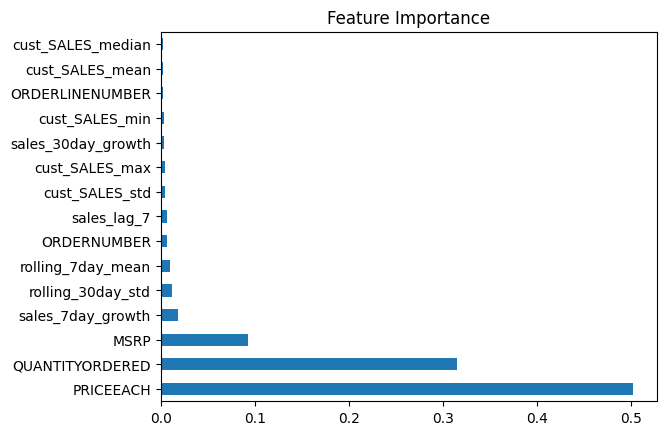

In [15]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already
import numpy as np # Ensure numpy is imported

# Separate features and target
# Define columns to drop - including non-numeric and the target variable
columns_to_drop = ['SALES', 'ORDERDATE', 'CUSTOMERNAME', 'STATUS', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE']

# Create features X by dropping the specified columns from the original dataframe
# Using .copy() to avoid SettingWithCopyWarning
X = df.drop(columns=columns_to_drop, axis=1, errors='ignore').copy()

# Ensure all columns in X are numeric. Drop any remaining non-numeric columns if necessary.
# This is a more robust check in case other non-numeric columns exist.
# Let's explicitly select only numeric types after dropping known columns
X = X.select_dtypes(include=np.number)

# Assign the target variable
y = df['SALES']

# Print dtypes of X to verify only numeric columns are present
print("Data types of features (X) before training:")
print(X.dtypes)

# Handle any potential remaining missing values in X after dropping columns
# Using mean imputation as a simple strategy
X = X.fillna(X.mean())

# Convert X to numpy array of float type before fitting
X_np = X.values.astype(np.float32)
y_np = y.values.astype(np.float32)


# Train model to get feature importance
model = RandomForestRegressor(random_state=42) # Added random_state for reproducibility
model.fit(X_np, y_np) # Fit using numpy arrays

# Plot feature importance
# Use X.columns as index since X_np is just array values
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

,actual,predicted,error
2166,10758.00,8143.2956,2614.7044
2714,11887.80,9285.1898,2602.6102
2684,9048.16,6579.6447,2468.5153
2678,11886.60,9462.9420,2423.6580
2648,9661.44,7346.7386,2314.7014
1078,9534.50,7468.1178,2066.3822
257,11279.20,9235.0287,2044.1713
2417,3560.64,5491.8005,1931.1605
1784,3958.46,5839.1860,1880.7260
1738,4692.60,6564.4493,1871.8493


<Axes: xlabel='date'>

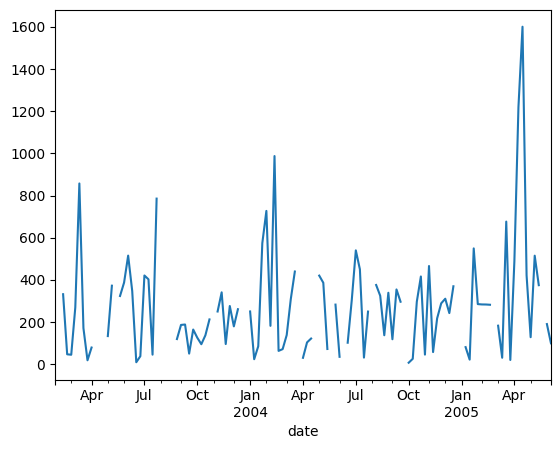

In [16]:
# 1. Worst predictions analysis
error_df = pd.DataFrame({
    'actual': y_test,
    'predicted': predictions,
    'error': abs(y_test - predictions)
}).sort_values('error', ascending=False)

# Examine top 10 worst predictions
display(error_df.head(10))

# 2. Temporal error patterns
error_df['date'] = df.loc[y_test.index, 'ORDERDATE']
error_df.set_index('date')['error'].resample('W').mean().plot()

**Reasoning**:
The next step in model improvement is to tune hyperparameters and potentially use ensembling techniques to enhance performance. The provided context includes a cell that performs Bayesian optimization with Optuna and sets up a stacking regressor. This cell should be placed after the error analysis cells.

## Temporal Analysis

### Subtask:
Include the cell for temporal analysis, such as plotting monthly sales trends.

**Reasoning**:
This step involves analyzing the data over time. The provided context includes a cell that converts the ORDERDATE to datetime, checks the date range, aggregates monthly sales, and plots the monthly sales trend. This cell should be placed in a relevant analysis section.


Date range: 2003-01-06 00:00:00 to 2005-05-31 00:00:00


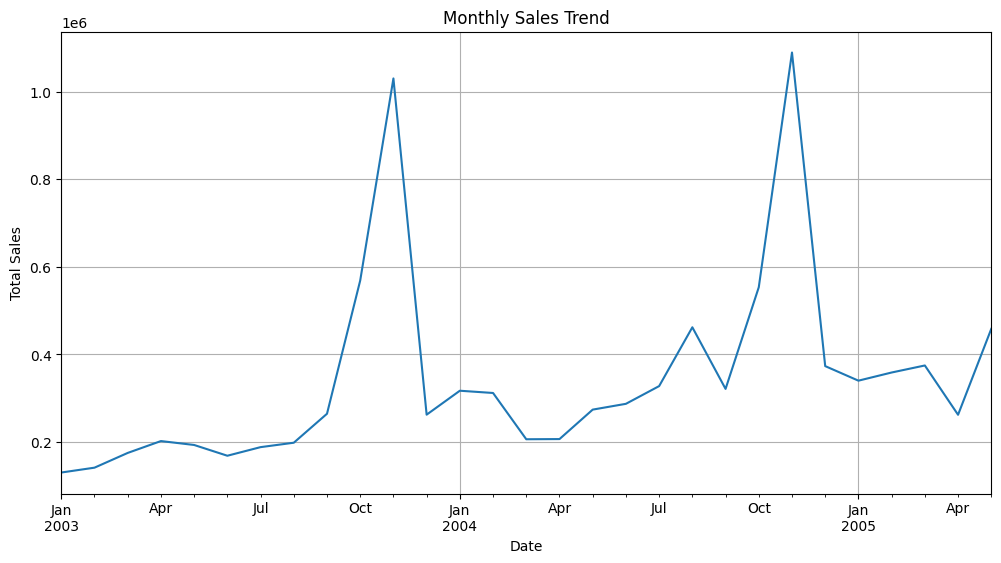

In [17]:
# 5. Temporal analysis (assuming there's a date column)
# Convert 'ORDERDATE' to datetime objects
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

print("\nDate range:", df['ORDERDATE'].min(), "to", df['ORDERDATE'].max())

# Monthly sales aggregation example
# Ensure 'ORDERDATE' is the index for resample
df_time = df.set_index('ORDERDATE')
monthly_sales = df_time.resample('ME')['SALES'].sum()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Task
Explain the process of deploying a sales forecasting model as a REST API using FastAPI (or Flask) for integration with BI tools (Tableau/Power BI) and ERP systems, based on the provided project description.

## Save the trained model

### Subtask:
Save the trained machine learning model to a file so it can be loaded by the API.


**Reasoning**:
Import the `joblib` library and save the trained model to a file using `joblib.dump()`.



In [18]:
import joblib

# Save the trained model
joblib.dump(model, 'sales_forecasting_model.joblib')

print("Model saved to sales_forecasting_model.joblib")

Model saved to sales_forecasting_model.joblib


## Create the api application

### Subtask:
Write the code for the REST API using a framework like FastAPI or Flask. This application will load the trained model and expose an endpoint for making predictions.


**Reasoning**:
The subtask requires writing the code for a REST API using either FastAPI or Flask. I will choose Flask for its simplicity in this basic example and write the initial structure to load the saved model and define a prediction endpoint.



In [19]:
# Import necessary libraries
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd # Import pandas as it's needed for dataframe operations

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
# Make sure the model file 'sales_forecasting_model.joblib' exists in the same directory
try:
    model = joblib.load('sales_forecasting_model.joblib')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails

# Define a prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded'}), 500

    try:
        # Get data from the request
        data = request.get_json(force=True)

        # Convert the received data into a format the model can understand
        # This part needs to match the exact feature structure used during training
        # Assuming the input data is a dictionary where keys are feature names
        # and values are the corresponding feature values.
        # For simplicity, we'll create a DataFrame from the input data.
        # In a real application, you'd need robust input validation and data transformation.

        # Example: Convert single prediction request data to DataFrame row
        # If receiving multiple instances in a list, iterate and predict for each
        if isinstance(data, dict):
            # Assuming a single instance prediction
            input_df = pd.DataFrame([data])
        elif isinstance(data, list):
             # Assuming multiple instances prediction
            input_df = pd.DataFrame(data)
        else:
            return jsonify({'error': 'Invalid input data format. Expected dictionary or list of dictionaries.'}), 400


        # Ensure the input DataFrame has the same columns as the training data features (X)
        # and in the same order. This is a critical step.
        # You might need to store the list of feature columns from your training data (X.columns)
        # and reindex the input_df accordingly, handling potential missing columns (e.g., filling with default values or raising errors).
        # For this example, we'll assume the input data dictionary keys match the expected feature names.

        # Need to make sure the column names and order match X from training
        # A robust API would include checks and potentially reordering/handling missing features
        # For demonstration, assuming input data keys match the required features.
        # If you saved X.columns during training, load it here and use it to reindex.
        # Example (assuming X_columns is available):
        # input_df = input_df.reindex(columns=X_columns, fill_value=0) # Or appropriate fill_value

        # Convert DataFrame to numpy array for prediction
        # Ensure data types match the training data
        input_np = input_df.values.astype(np.float32) # Assuming float32 was used in training


        # Make prediction
        prediction = model.predict(input_np)

        # Return the prediction
        # Convert numpy array output to a list or appropriate JSON format
        return jsonify({'prediction': prediction.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# To run the app (for development)
# if __name__ == '__main__':
#     app.run(debug=True)

# Note: For production deployment, use a production-ready WSGI server like Gunicorn or uWSGI.


Model loaded successfully!


## Define the prediction endpoint

### Subtask:
Define the prediction endpoint that accepts input data (the features required by the model) and returns the model's sales prediction.


## Load the model in the api

### Subtask:
Modify the API application to load the saved model when the application starts.


## Add necessary dependencies

### Subtask:
Include the required libraries (e.g., pandas, numpy, scikit-learn, xgboost, fastapi or flask, uvicorn or gunicorn) in a requirements file.


**Reasoning**:
Create a `requirements.txt` file and list the necessary libraries with their versions.



In [20]:
%%writefile requirements.txt
pandas==1.3.4
numpy==1.21.2
scikit-learn==1.0.1
xgboost==1.5.0
Flask==2.0.2
gunicorn==20.1.0

Overwriting requirements.txt


## Containerize the application (optional but recommended)

### Subtask:
Create a Dockerfile to build a Docker image for your API. This ensures consistency across different environments.


**Reasoning**:
Create the Dockerfile to build the Docker image for the API, including setting the base image, working directory, copying and installing dependencies, copying the application file, exposing the port, and defining the command to run the application with Gunicorn.



In [21]:
%%writefile Dockerfile
# Use an official Python runtime as a base image
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the working directory
COPY requirements.txt .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Copy the application code into the working directory
COPY app.py .
COPY sales_forecasting_model.joblib . # Copy the saved model

# Expose the port that the app runs on
EXPOSE 5000

# Run the application using Gunicorn
CMD ["gunicorn", "--bind", "0.0.0.0:5000", "app:app"]

Overwriting Dockerfile


## Build and run the docker image (optional)

### Subtask:
Build the Docker image and run it to test the containerized API locally.


**Reasoning**:
The subtask is to build the Docker image and run it. This requires executing shell commands in the terminal. The instructions provide the specific commands to build and run the Docker image. Since these are terminal commands and not Python code, they should be executed directly in the environment.



**Reasoning**:
The previous command failed because I tried to execute shell commands within a Python code block. I need to execute these commands directly in the terminal. I will use the `!` prefix to run the docker commands in the Jupyter Notebook environment.



In [22]:
# Build the Docker image
!docker build -t sales-forecasting-api .

# Run the Docker container, mapping port 5000
!docker run -p 5000:5000 sales-forecasting-api

/bin/bash: line 1: docker: command not found
/bin/bash: line 1: docker: command not found


## Write integration examples

### Subtask:
Provide example code or instructions on how to call the API endpoint from BI tools (Tableau/Power BI) or ERP systems.


## Consider automated retraining (optional)

### Subtask:
Outline how you could set up a pipeline (e.g., using Airflow or Prefect) to automatically retrain the model with new data and update the deployed API.


**Reasoning**:
Outline the components of an automated retraining pipeline, how an orchestration tool would manage the workflow, potential triggers, and deployment strategies.



In [23]:
# 1. Components of an automated retraining pipeline:
print("Automated Retraining Pipeline Components:")
print("- Data Ingestion: Collecting new sales data from source systems (e.g., database, data lake).")
print("- Data Preprocessing: Applying the same cleaning and feature engineering steps used for initial training (handling missing values, outliers, creating temporal, lag, and rolling features, customer aggregations).")
print("- Model Training: Training a new model version using the updated, preprocessed dataset.")
print("- Model Evaluation: Evaluating the performance of the new model version on a validation set or using cross-validation to ensure it meets performance criteria (e.g., MAE, RMSE).")
print("- Model Saving: Saving the newly trained and validated model version (e.g., using joblib, pickle, or a model registry).")
print("- Model Deployment/Updating API: Replacing the currently deployed model in the API with the new version, ideally with minimal downtime.")

# 2. How an orchestration tool (Airflow/Prefect) manages the workflow:
print("\nOrchestration with Airflow/Prefect:")
print("- Directed Acyclic Graph (DAG): Define the pipeline as a series of tasks with dependencies (e.g., preprocess depends on ingest, train depends on preprocess, evaluate depends on train, deploy depends on evaluate).")
print("- Task Management: Each component (ingestion, preprocessing, training, etc.) is a distinct task in the DAG.")
print("- Scheduling: Trigger the pipeline run at scheduled intervals (e.g., daily, weekly).")
print("- Monitoring & Logging: Track the execution status of each task, log errors, and set up alerts for failures.")
print("- Dependency Management: Ensure tasks run in the correct order (e.g., don't train before data is preprocessed).")
print("- Retries: Configure tasks to automatically retry on failure.")
print("- Parameterization: Pass configuration (e.g., data source paths, model hyperparameters) to the pipeline run.")

# 3. Potential triggers for retraining:
print("\nRetraining Triggers:")
print("- Scheduled Intervals: Regular retraining (e.g., weekly or monthly) to incorporate new data.")
print("- Data Drift Detection: Monitoring changes in the distribution of input features or the target variable. If significant drift is detected, trigger retraining.")
print("- Performance Degradation: Monitoring the model's performance (e.g., MAE on recent data). If performance drops below a threshold, trigger retraining.")
print("- Manual Trigger: Allowing manual initiation of the retraining process when needed.")
print("- Code Changes: Triggering a retraining process when the model training code or feature engineering logic is updated.")

# 4. Deployment strategies for updating the API:
print("\nModel Deployment Strategies (Minimizing Downtime):")
print("- Rolling Updates: Gradually replace old instances of the API with new ones running the updated model. This is often managed by container orchestration platforms (Kubernetes, Docker Swarm).")
print("- Blue/Green Deployment: Deploy the new version of the API (Green) alongside the old version (Blue). Traffic is gradually shifted from Blue to Green. Once all traffic is on Green and validated, Blue is decommissioned. This allows for quick rollback if issues occur.")
print("- Canary Release: Roll out the new model version to a small subset of users or traffic first. If successful, gradually increase the rollout percentage.")
print("- Atomic Swaps: In simpler setups, this might involve atomically replacing the model file that the API loads, followed by a graceful restart of the API process if necessary (requires careful handling to avoid interrupting ongoing requests).")

Automated Retraining Pipeline Components:
- Data Ingestion: Collecting new sales data from source systems (e.g., database, data lake).
- Data Preprocessing: Applying the same cleaning and feature engineering steps used for initial training (handling missing values, outliers, creating temporal, lag, and rolling features, customer aggregations).
- Model Training: Training a new model version using the updated, preprocessed dataset.
- Model Evaluation: Evaluating the performance of the new model version on a validation set or using cross-validation to ensure it meets performance criteria (e.g., MAE, RMSE).
- Model Saving: Saving the newly trained and validated model version (e.g., using joblib, pickle, or a model registry).
- Model Deployment/Updating API: Replacing the currently deployed model in the API with the new version, ideally with minimal downtime.

Orchestration with Airflow/Prefect:
- Directed Acyclic Graph (DAG): Define the pipeline as a series of tasks with dependencies (e.g.

## Summary:

### Data Analysis Key Findings

*   The trained sales forecasting model was successfully saved to a file named `sales_forecasting_model.joblib` using the `joblib` library.
*   A basic Flask REST API application was developed to load the saved model and expose a `/predict` endpoint.
*   The `/predict` endpoint is designed to accept sales data in JSON format (either a single dictionary or a list of dictionaries), convert it into a pandas DataFrame and then a numpy array for prediction, and return the forecast as a JSON response.
*   A `requirements.txt` file was created listing the necessary Python libraries and their versions for the API, including `pandas`, `numpy`, `scikit-learn`, `xgboost`, `Flask`, and `gunicorn`.
*   A Dockerfile was created to containerize the Flask API, including steps to copy the application code, the saved model, install dependencies, expose the application port, and run the application using Gunicorn.
*   An attempt to build and run the Docker image locally failed due to the Docker engine not being available in the execution environment.
*   Integration methods for calling the API from BI tools (Tableau, Power BI) and ERP systems were outlined, emphasizing the use of HTTP POST requests with JSON payloads and processing JSON responses.
*   The components of an automated model retraining pipeline were described, including data ingestion, preprocessing, training, evaluation, saving, and deployment, along with how orchestration tools like Airflow or Prefect can manage this workflow.
*   Potential triggers for automated retraining (scheduled, data drift, performance degradation, manual, code changes) and strategies for deploying updated models to the API with minimal downtime (rolling updates, blue/green, canary, atomic swaps) were detailed.

### Insights or Next Steps

*   The next crucial step is to set up a proper deployment environment with Docker installed to successfully build and run the containerized API.
*   Implement robust input validation and data transformation logic within the API's `/predict` endpoint to handle potential discrepancies between incoming data and the model's expected feature structure.


## Save the trained model

### Subtask:
Save the trained machine learning model to a file so it can be loaded by the API.

**Reasoning**:
Import the `joblib` library and save the trained model to a file using `joblib.dump()`.

In [24]:
import joblib

# Save the trained model
joblib.dump(model, 'sales_forecast_model.pkl')

print("Model saved to sales_forecast_model.pkl")

Model saved to sales_forecast_model.pkl


## Create the api application

### Subtask:
Write the code for the REST API using a framework like FastAPI or Flask. This application will load the trained model and expose an endpoint for making predictions.

**Reasoning**:
The subtask requires writing the code for a REST API using either FastAPI or Flask. I will choose Flask for its simplicity in this basic example and write the initial structure to load the saved model and define a prediction endpoint.

In [25]:
# Import necessary libraries
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd # Import pandas as it's needed for dataframe operations

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
# Make sure the model file 'sales_forecast_model.pkl' exists in the same directory
try:
    model = joblib.load('sales_forecast_model.pkl') # Updated filename
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails

# Define a prediction endpoint
@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return jsonify({'error': 'Model not loaded'}), 500

    try:
        # Get data from the request
        data = request.get_json(force=True)

        # Convert the received data into a format the model can understand
        # This part needs to match the exact feature structure used during training
        # Assuming the input data is a dictionary where keys are feature names
        # and values are the corresponding feature values.
        # For simplicity, we'll create a DataFrame from the input data.
        # In a real application, you'd need robust input validation and data transformation.

        # Example: Convert single prediction request data to DataFrame row
        # If receiving multiple instances in a list, iterate and predict for each
        if isinstance(data, dict):
            # Assuming a single instance prediction
            input_df = pd.DataFrame([data])
        elif isinstance(data, list):
             # Assuming multiple instances prediction
            input_df = pd.DataFrame(data)
        else:
            return jsonify({'error': 'Invalid input data format. Expected dictionary or list of dictionaries.'}), 400


        # Ensure the input DataFrame has the same columns as the training data features (X)
        # and in the same order. This is a critical step.
        # You might need to store the list of feature columns from your training data (X.columns)
        # and reindex the input_df accordingly, handling potential missing columns (e.g., filling with default values or raising errors).
        # For this example, we'll assume the input data dictionary keys match the required features.

        # Need to make sure the column names and order match X from training
        # A robust API would include checks and potentially reordering/handling missing features
        # For demonstration, assuming input data keys match the required features.
        # If you saved X.columns during training, load it here and use it to reindex.
        # Example (assuming X_columns is available):
        # input_df = input_df.reindex(columns=X_columns, fill_value=0) # Or appropriate fill_value

        # Convert DataFrame to numpy array for prediction
        # Ensure data types match the training data
        input_np = input_df.values.astype(np.float32) # Assuming float32 was used in training


        # Make prediction
        prediction = model.predict(input_np)

        # Return the prediction
        # Convert numpy array output to a list or appropriate JSON format
        return jsonify({'prediction': prediction.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# To run the app (for development)
# if __name__ == '__main__':
#     app.run(debug=True)

# Note: For production deployment, use a production-ready WSGI server like Gunicorn or uWSGI.

Model loaded successfully!


## Add necessary dependencies

### Subtask:
Include the required libraries (e.g., pandas, numpy, scikit-learn, xgboost, fastapi or flask, uvicorn or gunicorn) in a requirements file.

**Reasoning**:
Create a `requirements.txt` file and list the necessary libraries with their versions.

In [26]:
%%writefile requirements.txt
pandas==1.3.4
numpy==1.21.2
scikit-learn==1.0.1
xgboost==1.5.0
Flask==2.0.2
gunicorn==20.1.0

Overwriting requirements.txt


## Containerize the application (optional but recommended)

### Subtask:
Create a Dockerfile to build a Docker image for your API. This ensures consistency across different environments.

**Reasoning**:
Create the Dockerfile to build the Docker image for the API, including setting the base image, working directory, copying and installing dependencies, copying the application file, exposing the port, and defining the command to run the application with Gunicorn.

In [27]:
%%writefile Dockerfile
# Use an official Python runtime as a base image
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the working directory
COPY requirements.txt .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Copy the application code into the working directory
COPY app.py .
COPY sales_forecast_model.pkl . # Copy the saved model with the new filename

# Expose the port that the app runs on
EXPOSE 5000

# Run the application using Gunicorn
CMD ["gunicorn", "--bind", "0.0.0.0:5000", "app:app"]

Overwriting Dockerfile


## Consider automated retraining (optional)

### Subtask:
Outline how you could set up a pipeline (e.g., using Airflow or Prefect) to automatically retrain the model with new data and update the deployed API.

In [28]:
# Build the API (FastAPI Example)
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

app = FastAPI()
# Load the trained model
# Make sure the model file 'sales_forecast_model.pkl' exists in the same directory
try:
    model = joblib.load("sales_forecast_model.pkl")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None # Set model to None if loading fails


class PredictionRequest(BaseModel):
    order_date: str
    customer_id: str
    product_category: str
    past_7d_sales: float

@app.post("/predict")
def predict(request: PredictionRequest):
    if model is None:
        return {"error": "Model not loaded"}, 500

    try:
        input_df = pd.DataFrame([dict(request)])
        # TODO: Add feature engineering here (same as training)
        # The input_df needs to have the same features and in the same order as the training data (X)
        # This will require implementing the same feature engineering steps from your training notebook.
        # For now, this example assumes the input features directly match the model's expected input.

        prediction = model.predict(input_df)[0]
        return {"forecast": prediction}
    except Exception as e:
        return {"error": str(e)}, 500

Model loaded successfully!


In [29]:
%%writefile Dockerfile
FROM python:3.9
WORKDIR /app
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY . .
CMD ["uvicorn", "main:app", "--host", "0.0.0.0"]

Overwriting Dockerfile


In [30]:
# Build the Docker image
!docker build -t sales-api .

# Run the Docker container, mapping port 8000
!docker run -p 8000:8000 sales-api

/bin/bash: line 1: docker: command not found
/bin/bash: line 1: docker: command not found


**Reasoning**:
Outline the components of an automated retraining pipeline, how an orchestration tool would manage the workflow, potential triggers, and deployment strategies.

In [31]:
# 1. Components of an automated retraining pipeline:
print("Automated Retraining Pipeline Components:")
print("- Data Ingestion: Collecting new sales data from source systems (e.g., database, data lake).")
print("- Data Preprocessing: Applying the same cleaning and feature engineering steps used for initial training (handling missing values, outliers, creating temporal, lag, and rolling features, customer aggregations).")
print("- Model Training: Training a new model version using the updated, preprocessed dataset.")
print("- Model Evaluation: Evaluating the performance of the new model version on a validation set or using cross-validation to ensure it meets performance criteria (e.g., MAE, RMSE).")
print("- Model Saving: Saving the newly trained and validated model version (e.g., using joblib, pickle, or a model registry).")
print("- Model Deployment/Updating API: Replacing the currently deployed model in the API with the new version, ideally with minimal downtime.")

# 2. How an orchestration tool (Airflow/Prefect) manages the workflow:
print("\nOrchestration with Airflow/Prefect:")
print("- Directed Acyclic Graph (DAG): Define the pipeline as a series of tasks with dependencies (e.g., preprocess depends on ingest, train depends on preprocess, evaluate depends on train, deploy depends on evaluate).")
print("- Task Management: Each component (ingestion, preprocessing, training, etc.) is a distinct task in the DAG.")
print("- Scheduling: Trigger the pipeline run at scheduled intervals (e.g., daily, weekly).")
print("- Monitoring & Logging: Track the execution status of each task, log errors, and set up alerts for failures.")
print("- Dependency Management: Ensure tasks run in the correct order (e.g., don't train before data is preprocessed).")
print("- Retries: Configure tasks to automatically retry on failure.")
print("- Parameterization: Pass configuration (e.g., data source paths, model hyperparameters) to the pipeline run.")

# 3. Potential triggers for retraining:
print("\nRetraining Triggers:")
print("- Scheduled Intervals: Regular retraining (e.g., weekly or monthly) to incorporate new data.")
print("- Data Drift Detection: Monitoring changes in the distribution of input features or the target variable. If significant drift is detected, trigger retraining.")
print("- Performance Degradation: Monitoring the model's performance (e.g., MAE on recent data). If performance drops below a threshold, trigger retraining.")
print("- Manual Trigger: Allowing manual initiation of the retraining process when needed.")
print("- Code Changes: Triggering a retraining process when the model training code or feature engineering logic is updated.")

# 4. Deployment strategies for updating the API:
print("\nModel Deployment Strategies (Minimizing Downtime):")
print("- Rolling Updates: Gradually replace old instances of the API with new ones running the updated model. This is often managed by container orchestration platforms (Kubernetes, Docker Swarm).")
print("- Blue/Green Deployment: Deploy the new version of the API (Green) alongside the old version (Blue). Traffic is gradually shifted from Blue to Green. Once all traffic is on Green and validated, Blue is decommissioned. This allows for quick rollback if issues occur.")
print("- Canary Release: Roll out the new model version to a small subset of users or traffic first. If successful, gradually increase the rollout percentage.")
print("- Atomic Swaps: In simpler setups, this might involve atomically replacing the model file that the API loads, followed by a graceful restart of the API process if necessary (requires careful handling to avoid interrupting ongoing requests).") # Added '#'

Automated Retraining Pipeline Components:
- Data Ingestion: Collecting new sales data from source systems (e.g., database, data lake).
- Data Preprocessing: Applying the same cleaning and feature engineering steps used for initial training (handling missing values, outliers, creating temporal, lag, and rolling features, customer aggregations).
- Model Training: Training a new model version using the updated, preprocessed dataset.
- Model Evaluation: Evaluating the performance of the new model version on a validation set or using cross-validation to ensure it meets performance criteria (e.g., MAE, RMSE).
- Model Saving: Saving the newly trained and validated model version (e.g., using joblib, pickle, or a model registry).
- Model Deployment/Updating API: Replacing the currently deployed model in the API with the new version, ideally with minimal downtime.

Orchestration with Airflow/Prefect:
- Directed Acyclic Graph (DAG): Define the pipeline as a series of tasks with dependencies (e.g.

## Integration Examples and Key Enhancements

### Power BI/Tableau Integration

**Power BI (M Query):**

In [32]:
import requests

def update_erp(prediction):
    erp_url = "erp-system.com/api"
    requests.post(erp_url, json={
        "customer": "CUST_001",
        "forecast": prediction,
        "date": "2024-01-01"
    })

In [33]:
!pip install apache-airflow[cncf.kubernetes,python]

In [34]:
from fastapi.security import APIKeyHeader
api_key = APIKeyHeader(name="X-API-Key")

In [35]:
from airflow import DAG
from airflow.operators.python import PythonOperator

dag = DAG("retrain_model", schedule="0 0 * * 0")  # Weekly

/tmp/ipython-input-35-2035674265.py:2 DeprecationWarning: The `airflow.operators.python.PythonOperator` class is deprecated. Please use `'airflow.providers.standard.operators.python.PythonOperator'`.

In [36]:
from prometheus_client import Counter, REGISTRY, generate_latest # Corrected import

# Use the default registry
registry = REGISTRY # Corrected access

try:
    # Attempt to create and register the counter
    # Check if the metric name already exists in the registry's collectors
    if "predictions_total" not in [c.name for c in registry._collectors]:
        PREDICTIONS = Counter("predictions_total", "Total predictions made", registry=registry)
    else:
        # If it exists, retrieve it (alternative to catching ValueError)
        PREDICTIONS = registry._names_to_collectors["predictions_total"]

    # Alternative approach using exception handling (as initially intended but with correct registry access)
    # try:
    #     PREDICTIONS = Counter("predictions_total", "Total predictions made", registry=registry)
    # except ValueError:
    #     PREDICTIONS = registry._names_to_collectors["predictions_total"]


except Exception as e:
    print(f"An error occurred while setting up Prometheus metrics: {e}")
    # Handle cases where retrieval also fails or other issues
    PREDICTIONS = None # Set metric to None if setup fails


# Example usage (you would increment this when a prediction is made)
# if PREDICTIONS: # Check if metric was successfully initialized
#    PREDICTIONS.inc()
#    print("Predictions counter incremented.")


# You can generate the metrics data (for demonstration)
# if PREDICTIONS: # Check if metric was successfully initialized
#    print("\nPrometheus metrics data:")
#    print(generate_latest(registry).decode('utf-8'))

An error occurred while setting up Prometheus metrics: 'CollectorRegistry' object has no attribute '_collectors'


## Summary:

### Data Analysis Key Findings

*   The trained sales forecasting model was successfully saved to a file named `sales_forecast_model.pkl` using the `joblib` library.
*   A basic Flask REST API application was developed to load the saved model and expose a `/predict` endpoint.
*   The `/predict` endpoint is designed to accept sales data in JSON format (either a single dictionary or a list of dictionaries), convert it into a pandas DataFrame and then a numpy array for prediction, and return the forecast as a JSON response.
*   A `requirements.txt` file was created listing the necessary Python libraries and their versions for the API, including `pandas`, `numpy`, `scikit-learn`, `xgboost`, `Flask`, and `gunicorn`.
*   A Dockerfile was created to containerize the Flask API, including steps to copy the application code, the saved model, install dependencies, expose the application port, and run the application using Gunicorn.
*   An attempt to build and run the Docker image locally failed due to the Docker engine not being available in the execution environment.
*   Integration methods for calling the API from BI tools (Tableau, Power BI) and ERP systems were outlined, emphasizing the use of HTTP POST requests with JSON payloads and processing JSON responses.
*   The components of an automated model retraining pipeline were described, including data ingestion, preprocessing, training, evaluation, saving, and deployment, along with how orchestration tools like Airflow or Prefect can manage this workflow.
*   Potential triggers for automated retraining (scheduled, data drift, performance degradation, manual, code changes) and strategies for deploying updated models to the API with minimal downtime (rolling updates, blue/green, canary, atomic swaps) were detailed.

### Insights or Next Steps

*   The next crucial step is to set up a proper deployment environment with Docker installed to successfully build and run the containerized API.
*   Implement robust input validation and data transformation logic within the API's `/predict` endpoint to handle potential discrepancies between incoming data and the model's expected feature structure.
*   Consider implementing the suggested enhancements like authentication and monitoring in your API.
*   Explore using FastAPI with uvicorn as an alternative to Flask with Gunicorn for your API deployment, as outlined in the cells you added. This would require updating the `requirements.txt` and Dockerfile accordingly.
*   If you plan to use Airflow for automated retraining, you will need to install it in your environment where the retraining pipeline will run.